# p-T plane and Gibbs free nergy


**Code:** #11B-000

**File:** `apps/van_der_waals/p_T_2D.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fp_T_2D.ipynb)

-----------

The aim of this Notebook is to visualize the Gibbs energy in different points of the p-T plane.

## Interface

The main interface (``main_block_11B_000``) is divided in two VBox containing two bqplot Figures and ``fig_11B_001`` and ``fig_11B_001``.

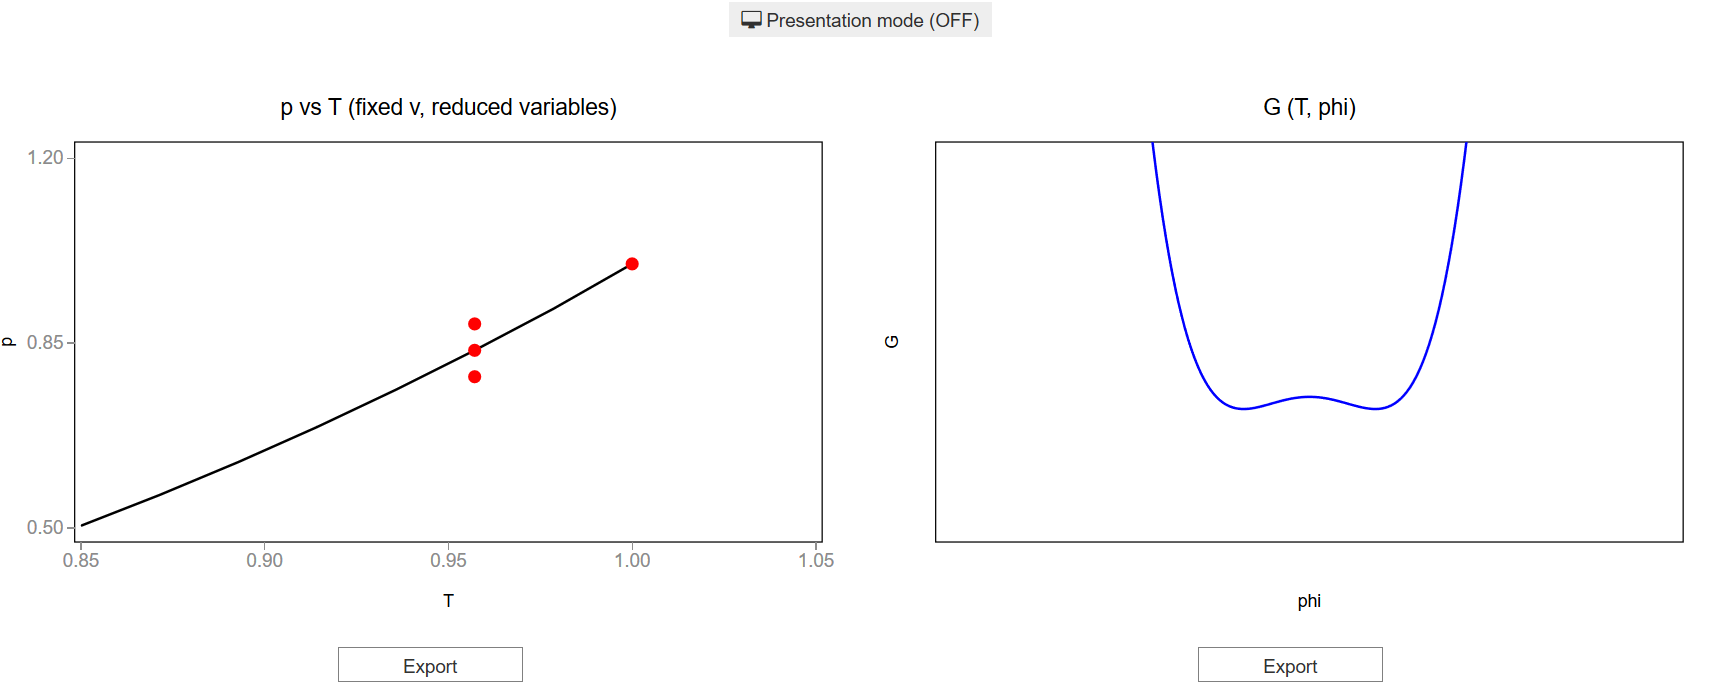

In [1]:
from IPython.display import Image
Image(filename='../../static/images/apps/11B-000_1.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [2]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [3]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`
- `experimental_isotherms`
- `find_real_fixed_T`
- `get_roots`
- `p_indefinite_integral`
- `definite_integral`
- `get_gibbs_energy`

In [4]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

In [5]:
def experimental_isotherms(p_range, v_range, T_range, fixed_p, fixed_T):
    """This function calculates the experimental p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state for a given range of volumes
        and tenperatures or for a given range of volumes
        and pressures.

    Args:
        p_range: An array containing the values of p
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_p == True.\n
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_T == True.\n
        fixed_p: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n
        fixed_T: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n

        
    Returns:
        expe_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        theo_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        v_limits: A list consisted of arrays of the volume limits of
        the phase-transition of each subcritical isotherm.\n
        p_limits: A list consisted of arrays of the pressure limits of
        the phase-transition of each subcritical isotherm.\n
        tenperatures: A list consisted of the tenperatures of the
        isotherms.\n
    """
    
    if fixed_T:
    
        theo_data = get_relative_isotherms(v_range, T_range)
        expe_data = []

        v_limits = []
        p_limits = []

        p_range = np.linspace(0.001, 1.0, num=10000)
        pressures, v_isobaric_limits = find_real_fixed_T(p_range, T_range)

        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(pressures[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [pressures[i], pressures[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        tenperatures = T_range
        
        return expe_data, theo_data, p_limits, v_limits, tenperatures
    
    elif fixed_p:
        
        tenperatures, v_isobaric_limits = find_real_fixed_p(p_range, T_range)

        theo_data = get_relative_isotherms(v_range, tenperatures)
        expe_data = []

        v_limits = []
        p_limits = []
        
        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(p_range[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [p_range[i], p_range[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        return expe_data, theo_data, p_limits, v_limits, tenperatures

In [6]:
def get_roots(p, T):
    """This function finds the intersection between an isobaric curve
       and Van der Waals equation of state for a given T.\n
       Values of v with no physical meaning are dismissed
       (v < 0 or complex).

    Args:
        p: Pressure of the isobaric curve.\n
        T: Tenperature of the isotherm.\n

        
    Returns:
        roots_in_range: A sorted list of the volumes in which the
        isobaric curve intersects the isotherm.\n
    """
    
    roots = np.roots([1.0, - 1.0/3.0*(1.0 + 8.0*T/p), 3.0/p, -1.0/p])
    roots_in_range = []
    
    for root in roots:
        
        # A third degree polynomial has 3 complex roots,
        # but we are only interested in the ones which are
        # purely real.
        
        if np.isreal(root):
            
            root = np.real(root)
            
            if root > 0:
                
                roots_in_range.append(root)

    roots_in_range.sort()
    
    return roots_in_range

In [7]:
def p_indefinite_integral(p_0, v_0, T):
    """This function calculates the indefinite integral between
    a van der Waals isotherm and a isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v0: Value of the volume.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the indefinite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 at a
        volume v0.\n
    """
    
    integral = 8.0/3.0 * T *np.log(v_0 - 1.0/3.0) + 3.0/v_0 - p_0*v_0
    
    return integral

In [8]:
def definite_integral(p_0, v_range, T):
    """This function 'p_indefinite_integral' function to calculate
    the definite integral between a van der Waals isotherm and a
    isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v_range: Tuple or list consisted of volume limits.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the definite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 in a
        volume range v_range.\n
    """
    
    v_0, v_1 = v_range[0], v_range[1]
    
    integral = p_indefinite_integral(p_0, v_1, T) - p_indefinite_integral(p_0, v_0, T)
    
    return integral

In [9]:
def find_real_fixed_T(p_values, T_values):
    """This function uses Maxwell's construction to find the
       pressures in which phase transition happens given some
       fixed tenperatures.\n

    Args:
        p_values: List of pressures in which the real isotherm is
        searched.\n
        T_values: List of tenperatures of the isotherms.\n

        
    Returns:
        pressures: List of pressures in which phase transition
        happens.\n
        v_range: Volume limits of phase transition zones.
    """
    
    eps = 1e-3
    
    pressures = []
    v_ranges = []
    
    for T in T_values:
        
        if T < 1.0:
        
            for p in p_values:
                
                roots = get_roots(p, T)
                
                if len(roots) == 3:
                    
                    v_range = [roots[0], roots[2]]
                    area = definite_integral(p, v_range, T)
                    
                    if abs(area) < eps:
                        
                        pressures.append(p)
                        v_ranges.append(v_range)
                        
                        break
                        
        elif T == 1.0:
            
            pressures.append(1.0)
            v_ranges.append([1.0])

    return pressures, v_ranges

In [10]:
def get_gibbs_energy(G_1, G_2, G_3, G_4, phi):
    """This function calculates the representation of Gibbs energy
    for a given constants.\n
    
    G = G_1*phi + G_2*phi**2 + G_3*phi**3 + G_4*phi**4
    
    Args:
        G_1, G_2, G_3, G_4: Values of the parameters.
        phi: Array consisted of the values where Gibbs energy 
        must be calculated.
        
    Returns:
        gibbs: Array containing the values of Gibbs energy.
        
    """
    gibbs = []
    
    for f in phi:
        gibbs = np.append(gibbs, G_1*f + G_2*f**2 + G_3*f**3 + G_4*f**4)
        
    return gibbs

## Functions related to interaction

In [11]:
def hover_handler(self, content):
    """This function update the line 'gibbs_lines' from
    'fig_11B_002' when the cursor goes over 'scatter_points'.
    """
    
    g = {0:[-40, -40, 1.0, 20],
         1:[0, -40, 0, 40],
         2:[40, -40, -1.0, 20],
         3:[0, 40, 0, 20]}

    params = g.get(content.get('data').get('index'))

    gibbs = get_gibbs_energy(
        G_1=params[0],
        G_2=params[1],
        G_3=params[2],
        G_4=params[3],
        phi = phi
    )

    scale_y_11B_002.min = min(gibbs) - 100
    scale_y_11B_002.max = 200
    
    gibbs_lines.y = gibbs
    #tt_box.children = [fig_11B_002,]

In [12]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [13]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_11B_001_button:
        
        export_plot(fig_11B_001)
    
    elif button is prepare_export_fig_11B_002_button:
        
        export_plot(fig_11B_002)

In [14]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [15]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
v_values = np.linspace(start=0.4, stop=5, num=1000)
T_values = np.linspace(start=0.85, stop=1.0, num=8)

expe_data, theo_data, trans_pressures, v_limits, trans_tenperatures = experimental_isotherms(
     p_range = [],
     v_range = v_values,
     T_range = T_values,
     fixed_p = False,
     fixed_T = True
)
    
trans_pressures = np.unique(trans_pressures)
    
j = 5

scatter_pres = [
    trans_pressures[j]-0.05,
    trans_pressures[j],
    trans_pressures[j]+0.05,
    1.0
]

scatter_tenp = [T_values[j], T_values[j], T_values[j], 1.0]

phi = np.linspace(-12, 5, 500)

scale_x_11B_001 = bqs.LinearScale(min = min(T_values), max = 1.05)
scale_y_11B_001 = bqs.LinearScale(min = min(trans_pressures), max = 1.2)

fig_11B_001 = bq.Figure(
    title='p vs T (fixed v, reduced variables)',
    marks=[],
    axes=[],
    animation_duration=0,
    layout = widgets.Layout(width='100%'),
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=80, bottom=80, left=60, right=30),
    toolbar = True,
)

axis_x_11B_001 = bqa.Axis(
    scale=scale_x_11B_001,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0.85, 0.9, 0.95, 1, 1.05],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='T',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_11B_001 = bqa.Axis(
    scale=scale_y_11B_001,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0.5, 0.85, 1.2],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_11B_001.axes = [
    axis_x_11B_001,
    axis_y_11B_001
]

pressures_lines = bqm.Lines(
    name = '',
    x = T_values,
    y = trans_pressures,
    scales = {'x': scale_x_11B_001, 'y': scale_y_11B_001}, 
    visible = True,
    colors = ['black'],
    names = [],
    labels=['labels']
) 

critic_point = bqm.Scatter(
    name = '',
    x = [1.0],
    y = [1.0],
    scales = {'x': scale_x_11B_001, 'y': scale_y_11B_001}, 
    visible = True,
    colors = ['red'],
    names = [],
    labels=[]
) 

tt_box = widgets.HBox([])

scatter_points = bqm.Scatter(
    name = '',
    x = scatter_tenp,
    y = scatter_pres, 
    scales = {'x': scale_x_11B_001, 'y': scale_y_11B_001}, 
    visible = True,
    colors = ['red'],
    names = [],
    labels=[],
)

scatter_points.on_hover(hover_handler)

fig_11B_001.marks = [
    pressures_lines,
    scatter_points
]

scale_x_11B_002 = bqs.LinearScale(min = -4, max = 4)
scale_y_11B_002 = bqs.LinearScale()

fig_11B_002 = bq.Figure(
    title='G (T, phi)',
    marks=[],
    axes=[],
    animation_duration=0,
    layout = widgets.Layout(width='100%'),
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=80, bottom=80, left=60, right=30),
    toolbar = True
)

axis_x_11B_002 = bqa.Axis(
    scale=scale_x_11B_002,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='phi',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_11B_002 = bqa.Axis(
    scale=scale_y_11B_002,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='G',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='30px'
)

fig_11B_002.axes = [
    axis_x_11B_002,
    axis_y_11B_002
]

gibbs_lines = bqm.Lines(
    name = '',
    x = phi,
    y = [],
    scales = {'x': scale_x_11B_002, 'y': scale_y_11B_002}, 
    visible = True,
    colors = ['blue'],
    names = [],
    labels=['']
) 

fig_11B_002.marks = [gibbs_lines]

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

prepare_export_fig_11B_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11B_001_button.on_click(prepare_export)

prepare_export_fig_11B_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11B_002_button.on_click(prepare_export)

main_block_11B_000 = widgets.VBox(
    [],
    layout = widgets.Layout(
        align_items='center',
        width='100%'
    )
)

main_block_11B_000.children = [
    change_view_button,
    widgets.HBox([
        widgets.VBox([
            fig_11B_001,
            prepare_export_fig_11B_001_button
        ],
            layout = widgets.Layout(
                align_items='center',
                width='100%'
            )
        ),
        widgets.VBox([
            fig_11B_002,
            prepare_export_fig_11B_002_button
        ],
            layout = widgets.Layout(
                align_items='center',
                width='100%'
            )
        ),    
    ],
        layout = widgets.Layout(
                align_items='center',
                width='100%'
            )
    )
]

figures = [
    fig_11B_001,
    fig_11B_002
]

main_block_11B_000